Ptx = 0.0 dBm = 1.00 mW, max dist = 10853.70 m, area = 11813246.25 (125), 7064723.45 (250), 5189562.07 (500)
Ptx = 1.0 dBm = 1.26 mW, max dist = 10853.70 m, area = 2697137.34 (125), 1612979.96 (250), 1184853.12 (500)
Ptx = 2.0 dBm = 1.58 mW, max dist = 10853.70 m, area = 3312933.35 (125), 1981246.93 (250), 1455372.46 (500)
Ptx = 3.0 dBm = 2.00 mW, max dist = 10853.70 m, area = 4069324.61 (125), 2433594.66 (250), 1787655.33 (500)
Ptx = 4.0 dBm = 2.51 mW, max dist = 10853.70 m, area = 4998411.09 (125), 2989220.01 (250), 2195803.26 (500)
Ptx = 5.0 dBm = 3.16 mW, max dist = 10853.70 m, area = 6139621.64 (125), 3671702.77 (250), 2697137.34 (500)
Ptx = 6.0 dBm = 3.98 mW, max dist = 10853.70 m, area = 7541387.29 (125), 4510006.35 (250), 3312933.35 (500)
Ptx = 7.0 dBm = 5.01 mW, max dist = 10853.70 m, area = 9263196.60 (125), 5539706.94 (250), 4069324.61 (500)
Ptx = 8.0 dBm = 6.31 mW, max dist = 10853.70 m, area = 11378120.21 (125), 6804503.26 (250), 4998411.09 (500)
Ptx = 9.0 dBm = 7.94 mW, m

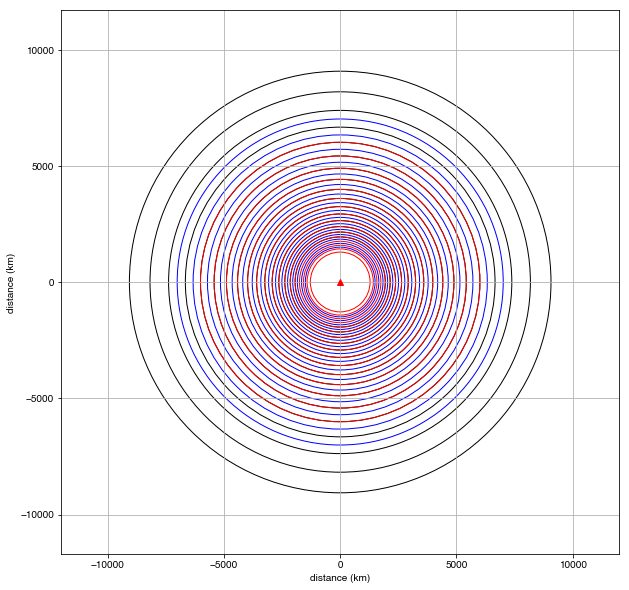

In [16]:
import numpy as np
import lora_tools
import matplotlib.pyplot as plt

maxPtx = 15.0 # dBm

lora_tools.Lpld0 = 95.0038
lora_tools.d0 = 40.0
lora_tools.gamma = 2.2394
lora_tools.var = 0.0

sf7 = np.array([7,-126.5,-124.25,-120.75])
sf8 = np.array([8,-127.25,-126.75,-124.0])
sf9 = np.array([9,-131.25,-128.25,-127.5])
sf10 = np.array([10,-132.75,-130.25,-128.75])
sf11 = np.array([11,-134.5,-132.75,-128.75])
sf12 = np.array([12,-133.25,-132.25,-132.25])

# array of sensitivity values
sensi = np.array([sf7,sf8,sf9,sf10,sf11,sf12])

# print(sensi[:,1:])

range_plot = plt.figure(figsize = (10,10))
range_ax = plt.gca()

bsPoints, = plt.plot(0.0, 0.0, "r^", label="base station")

for i in range(int(maxPtx)+1):
    
    if i == 0:
        prev_dist125 = 0.0
        prev_dist250 = 0.0
        prev_dist500 = 0.0
    
    dist125 = lora_tools.getDistanceFromPower(float(i), -132.75)
    dist250 = lora_tools.getDistanceFromPower(float(i), -130.25)
    dist500 = lora_tools.getDistanceFromPower(float(i), -128.75)

    area125 = np.pi * (dist125*dist125 - prev_dist125*prev_dist125)
    area250 = np.pi * (dist250*dist250 - prev_dist250*prev_dist250)
    area500 = np.pi * (dist500*dist500 - prev_dist500*prev_dist500)
    
    prev_dist125 = dist125
    prev_dist250 = dist250
    prev_dist500 = dist500

    print("Ptx = {} dBm = {:.02f} mW, max dist = {:.02f} m, area = {:.02f} (125), {:.02f} (250), {:0.2f} (500)".format(float(i), lora_tools.dBmtomW(float(i)), dist, area125, area250, area500))
    range_ax.add_artist(plt.Circle((0.0, 0.0), dist125, fill=False, color='black'))
    range_ax.add_artist(plt.Circle((0.0, 0.0), dist250, fill=False, color='blue'))
    range_ax.add_artist(plt.Circle((0.0, 0.0), dist500, fill=False, color='red'))

plt.grid()

plt.axis('equal')
plt.xlim((-12000, 12000))
plt.ylim((-12000, 12000))

plt.xlabel('distance (km)')
plt.ylabel('distance (km)')

plt.show()

In [5]:
import weakref


class testParent():
    def __init__(self):
        self.impObj = 20
        x = testChild(self)

class testChild():
    def __init__(self, parentObj):
        self.parent = weakref.ref(parentObj)
        print(parentObj)
        print(self.parent)

        
a = testParent()

<__main__.testParent instance at 0x10a10e560>
<weakref at 0x10a002940; to 'instance' at 0x10a10e560>


In [2]:
def placeRandomlyInRange(number, locArray, xRange, yRange, refLoc):
    for n in xrange(number):
#         rounds = 0
        while True:
            # This could technically turn into an infinite loop but that shouldn't ever practically happen.
            # add check here later
            x = random.uniform(xRange[0], xRange[1])
            y = random.uniform(yRange[0], yRange[1])
            if np.any(np.sum(np.square(refLoc[:,1:3] - np.array([x,y]).reshape(1,2)), axis=1) <= bestDist**2):
                locArray[n,:] = [n, x, y]
                break
                

                
def plotLocations():
    loc_plot = plt.figure(figsize = (5,5))
    loc_ax = plt.gca()
    
    for b in BSLoc[:,1:3]:
        loc_ax.add_artist(plt.Circle((b[0], b[1]), bestDist, fill=False, hatch='//', color = 'red'))
    
    nodePoints, = plt.plot(nodeLoc[:,1], nodeLoc[:,2], "b.", mfc='none', label="end device")
    bsPoints, = plt.plot(BSLoc[:,1], BSLoc[:,2], "r^", label="base station")
    
    plt.xticks([0, 5000, 10000, 15000, 20000], [0,5,10,15,20])
    plt.yticks([0, 5000, 10000, 15000, 20000], [0,5,10,15,20])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid()
    
    plt.axis('equal')
    plt.xlim((0, maxX))
    plt.ylim((0, maxY))
    
    plt.xlabel('distance (km)')
    plt.ylabel('distance (km)')
    
    plt.show()
    
plotLocations()

0.786586654699


In [14]:
print(range(10/2), range(10/2, 10))

([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])


In [11]:
a = {}*4
type(a)

TypeError: unsupported operand type(s) for *: 'dict' and 'int'